# Unit 1 Capstone School Lunch Participation 1972-2018

### **About my dataset**

I am using the dataset from National School lunch Assistance Program from 1969-2018 from Data.gov, this dataset features the Free Lunch, Reduced Price, Full Price participation along with total Lunches served and the percentage of Free Lunch to Reduced Price. This dataset covers participation nationwide in the school lunch program. You can find more on this dataset __[here](https://catalog.data.gov/dataset/national-school-lunch-assistance-program-participation-and-meals-served-data/resource/77700016-9f95-4652-869a-93f9f6f7a9ea)__ for simplicity sake I have changed the name of the file to lunchbreak.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


lunch_csv = pd.read_csv('lunchbreak.csv')
print(lunch_csv)
    

                                                       \
0                                              Fiscal   
1                                                Year   
2                                                       
3                                                1969   
4                                                1970   
5                                                1971   
6                                                1972   
7                                                1973   
8                                                1974   
9                                                1975   
10                                               1976   
11                                               1977   
12                                               1978   
13                                               1979   
14                                               1980   
15                                               1981   
16                             

In [2]:
lunch_csv.head()


,,-------Average Participation-------,Unnamed: 2,Unnamed: 3,Unnamed: 4,,Unnamed: 6
0,Fiscal,,Reduced,Full,,Total Lunches,Percent Free/RP
1,Year,Free,Price,Price,Total,Served,of Total
2,,----------Millions----------,NaN,NaN,NaN,NaN,%
3,1969,2.9,1],16.5,19.4,"3,368.20",15.1
4,1970,4.6,1],17.8,22.4,"3,565.10",20.7


In [3]:
# Here we are re-organizing the table by dropping the first 4 rows from the table
lunch_csv2 = lunch_csv[5:].dropna()
# Below we are renaming the columns
lunch_csv2.columns = ['Year', 'Free_Lunch', 'Reduced_Price', 'Full_Price', 'Total', 'Total_Lunches', 'Percent of Free/RP of Total']



In [7]:
lunch_csv2.head()


,Year,Free_Lunch,Reduced_Price,Full_Price,Total,Total_Lunches,Percent of Free/RP of Total
5,1971,5.8,0.5,17.8,24.1,"3,848.30",26.1
6,1972,7.3,0.5,16.6,24.4,"3,972.10",32.4
7,1973,8.1,0.5,16.1,24.7,"4,008.80",35
8,1974,8.6,0.5,15.5,24.6,"3,981.60",37.1
9,1975,9.4,0.6,14.9,24.9,"4,063.00",40.3


In [8]:
lunch_csv2.shape

(48, 7)

In [13]:
# We are taking the sum of the two columns to generate our A part of our A/B test
lunch_csv2['FL+RP'] = lunch_csv2['Free_Lunch'].astype(float) + lunch_csv2['Reduced_Price'].astype(float)

In [14]:
lunch_csv2.head()


,Year,Free_Lunch,Reduced_Price,Full_Price,Total,Total_Lunches,Percent of Free/RP of Total,FL+RP
5,1971,5.8,0.5,17.8,24.1,"3,848.30",26.1,6.3
6,1972,7.3,0.5,16.6,24.4,"3,972.10",32.4,7.8
7,1973,8.1,0.5,16.1,24.7,"4,008.80",35,8.6
8,1974,8.6,0.5,15.5,24.6,"3,981.60",37.1,9.1
9,1975,9.4,0.6,14.9,24.9,"4,063.00",40.3,10.0


## Data Exploration

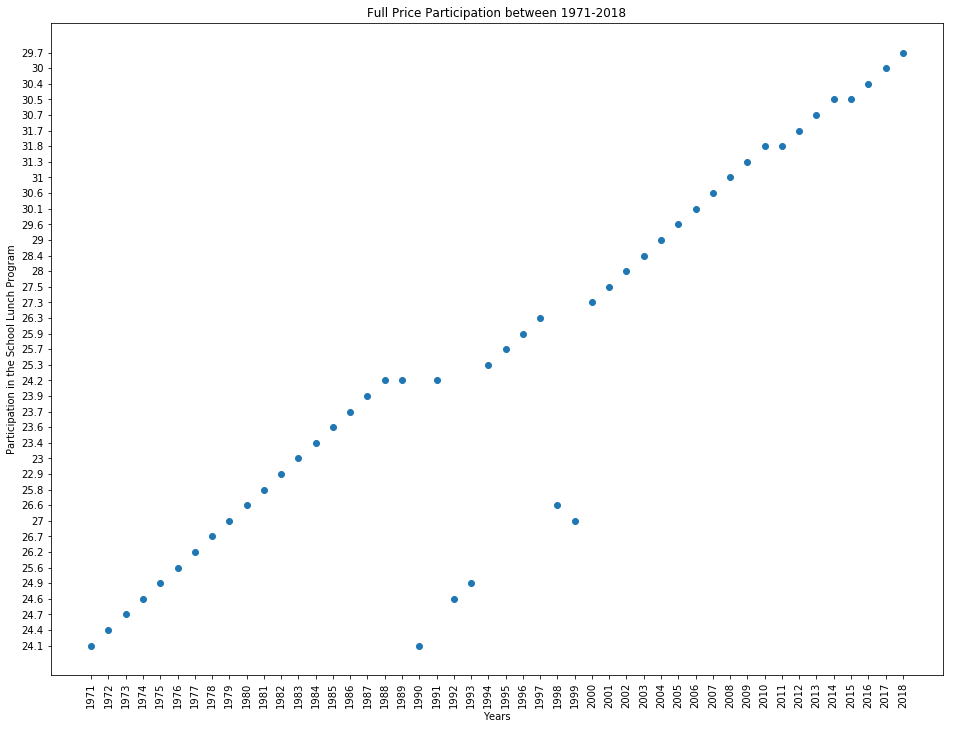

In [37]:
plt.figure(figsize=(16, 12))
plt.scatter(x=lunch_csv2['Year'], y=lunch_csv2['Total'])
plt.ylabel('Participation in the School Lunch Program')
plt.xticks(rotation = 90)
plt.xlabel('Years')
plt.title('Full Price Participation between 1971-2018')

plt.show()


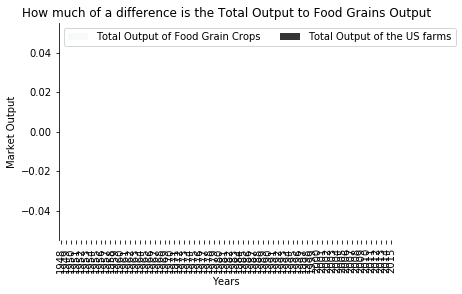

In [33]:
plt.figure(figsize=(16, 12))
sns.barplot(x="Year", y="Free_Lunch", data=lunch_csv2,
            label="Total Output of Food Grain Crops", palette='BuPu', order=np.arange(1948, 2016))

sns.barplot(x="Year", y='Reduced_Price', data=lunch_csv2,
            label="Total Output of the US farms", palette='GnBu_d', order=np.arange(1948, 2016))

plt.legend(ncol=2, loc="upper left", frameon=True)
plt.title('How much of a difference is the Total Output to Food Grains Output')
plt.xlabel("Years")
plt.ylabel("Market Output")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

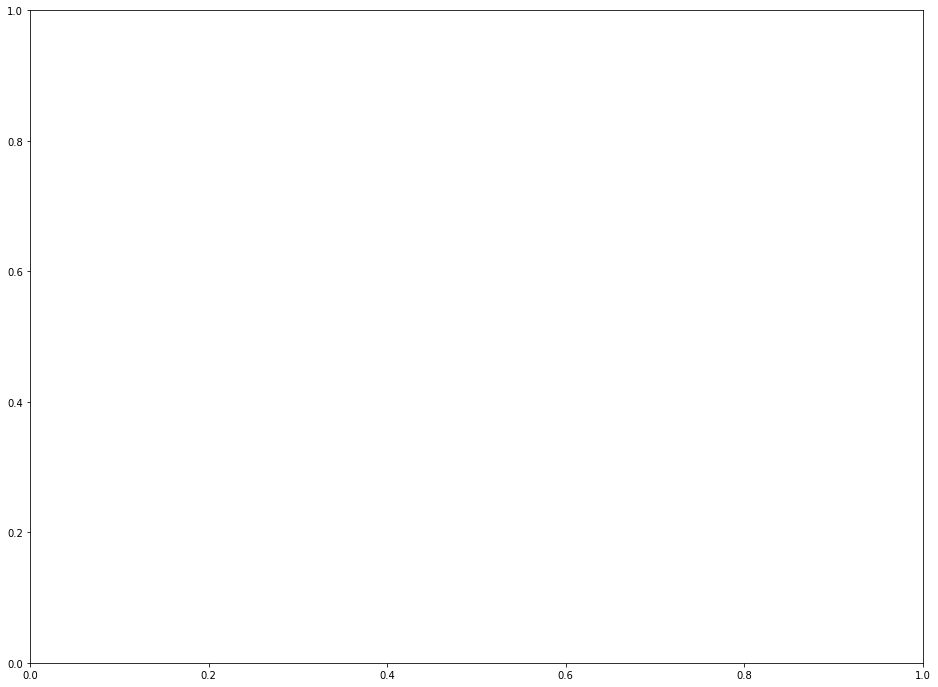

In [40]:
plt.figure(figsize=(16, 12))
sns.distplot(lunch_csv2['Year'], color="b", label="Happy Countries", kde = False)
sns.distplot(lunch_csv2['Total'], color="purple", label="Unhappy Countries", kde = False)
plt.legend(ncol=2, loc="upper left", frameon=True)
plt.title('How much Freedom the citizens are allowed')
plt.xlabel("Freedom")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)